In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data_set=np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',')
data_set[:5, 0:16]

array([[ 1.  ,  2.88,  2.16,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         3.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 60.  ],
       [ 2.  ,  3.4 ,  1.88,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 51.  ],
       [ 2.  ,  2.76,  2.08,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 59.  ],
       [ 2.  ,  3.68,  3.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 54.  ],
       [ 2.  ,  2.44,  0.96,  2.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 73.  ]])

In [3]:
x=data_set[:,0:16]  # 요소가 16개인 데이터
y=data_set[:,16]   # x 의 결과값 : label
print(x.shape, y.shape)

(470, 16) (470,)


In [4]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(x,y,epochs=5, batch_size=16)  #epochs 으로 반복 재생

Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 0.9411 - accuracy: 0.8489
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8511


In [6]:
# 최소제곱법으로 단순선형외귀분석(linear regression) 모델 생성
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])
mean_x = np.mean(x)
mean_y = np.mean(y)
print(f'x의 평균값 : {mean_x},  y의 평균값 : {mean_y}')

x의 평균값 : 5.0,  y의 평균값 : 90.5


In [7]:
# 기울기 공식 == ((x - x의 편균)(y - y의 편균))/(x - x의 편균)**2
div = sum([(i - mean_x)**2 for i in x])
top = 0
for i in range(len(x)):
    top += (x[i]-mean_x)*(y[i]-mean_y)
a= top/div
print(f'기울기 {a}')

기울기 2.3


In [8]:
#절편 b = y평균 - 기울기(a) * x의 평균
b = mean_y - a * mean_x
print(f'절편 {b}')

절편 79.0


In [9]:
pred_y = [a*i +b for i in x]
print(f'점수의 예측값 : {pred_y}')

점수의 예측값 : [83.6, 88.2, 92.8, 97.4]


In [10]:
print([y[i] - pred_y[i] for i in range(len(y))])

[-2.5999999999999943, 4.799999999999997, -1.7999999999999972, -0.4000000000000057]


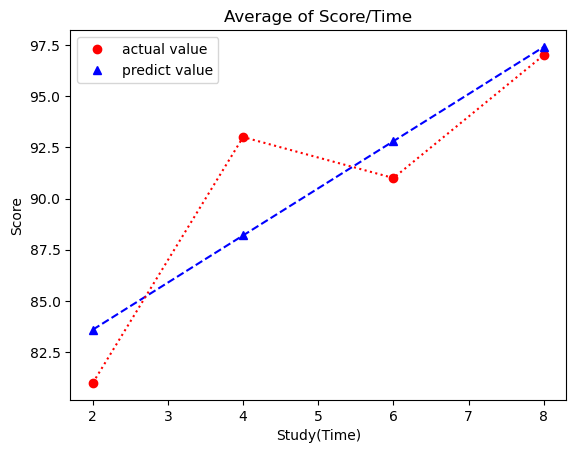

In [11]:
plt.plot(x,pred_y,'--',color='blue')
plt.plot(x,y,':',color='red')

plt.plot(x,y,'o' ,color='red',label='actual value' )
plt.plot(x,pred_y, '^', color='blue', label='predict value')

plt.title('Average of Score/Time')
plt.xlabel('Study(Time)')
plt.ylabel('Score')
plt.legend()

plt.show()

In [12]:
# 평균 제곱 오차 ( MSE ) 구함
fake_a = 3
fake_b = 76

# 공부시간, 성적 배열 생성

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

def predict(x):
    return x * fake_a + fake_b 

predict_result = [predict(i) for i in x]  #예측값 생성
print(f'예측 값 : {predict_result}')

mse_result = sum([(y[i]- predict_result[i])**2 for i in range(len(y))]) / len(y)
print(f'평균제곱 오차 : {mse_result}')

예측 값 : [82, 88, 94, 100]
평균제곱 오차 : 11.0


In [13]:
# 평균 제곱 오차 ( MSE ) 구함
fake_a = 3
fake_b = 76

# 공부시간, 성적 배열 생성

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

def predict(x):
    return x * fake_a + fake_b 

predict_result = [predict(i) for i in x]  #예측값 생성
print(f'예측 값 : {predict_result}')

mse_result = sum([(y[i]- predict_result[i])**2 for i in range(len(y))]) / len(y)
print(f'평균제곱 오차 : {mse_result}')

예측 값 : [82, 88, 94, 100]
평균제곱 오차 : 11.0


In [14]:
for x_value, y_value, y_predict in zip (x,y,predict_result):
    print('공부시간 : {}, 실제 점수 : {}, 예측 점수 : {}'.format(x_value, y_value,y_predict))
print('평균제곱 오차 : ', mse_result)

공부시간 : 2, 실제 점수 : 81, 예측 점수 : 82
공부시간 : 4, 실제 점수 : 93, 예측 점수 : 88
공부시간 : 6, 실제 점수 : 91, 예측 점수 : 94
공부시간 : 8, 실제 점수 : 97, 예측 점수 : 100
평균제곱 오차 :  11.0


왜 그래프를 옮기는거지?
왜 a를 편미분 했는데 ax**i 는 안 없어짐?

In [15]:
# 경사 하강법으로 a와 b를 찾기
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

a=0; b=0 # 기울기, 절편 0으로 초기화
lr = 0.03 # 학습률 설정
epochs = 2001 # 2001회 반복 실행
n= len(x)

for i in range(epochs):
    y_pred = a * x +b   # 예측값 구하기
    error = y - y_pred  # 실제값과 예측값의 차이 구하기
    
    a_diff = (2/n) * sum(-x * (error)) #오차값을 a로 편미분
    b_diff =  (2/n) * sum(-(error))   # 오차값을 b로 편미분
    
    a= a - lr * a_diff   # 다시 구하기 위해 a 값을 수정
    b= b - lr * b_diff   # b 값을 수정
    
    if i % 100 == 0:
        print('epochs : {}, a : {}, b= {}'.format(i, a, b))
        
# a, b의 최종 값의 예측값
y_pred = a *x +b
print('최종 예측값 : ',y_pred)

epochs : 0, a : 27.84, b= 5.43
epochs : 100, a : 7.073858435872394, b= 50.51166161138297
epochs : 200, a : 4.095999380762421, b= 68.28224379060177
epochs : 300, a : 2.9756829100119027, b= 74.96781336233505
epochs : 400, a : 2.5542024233262106, b= 77.48302865233052
epochs : 500, a : 2.3956349066513707, b= 78.42929177728175
epochs : 600, a : 2.3359793398132864, b= 78.78529068727728
epochs : 700, a : 2.313535987420573, b= 78.91922301600925
epochs : 800, a : 2.3050924490666174, b= 78.96961044185792
epochs : 900, a : 2.3019158585694823, b= 78.98856697541248
epochs : 1000, a : 2.3007207758016315, b= 78.99569871827002
epochs : 1100, a : 2.300271167070735, b= 78.99838179089187
epochs : 1200, a : 2.3001020172709508, b= 78.9993912045567
epochs : 1300, a : 2.300038380484562, b= 78.99977096168232
epochs : 1400, a : 2.3000144393354365, b= 78.9999138322214
epochs : 1500, a : 2.3000054323026444, b= 78.99996758234106
epochs : 1600, a : 2.300002043716771, b= 78.99998780397235
epochs : 1700, a : 2.30000

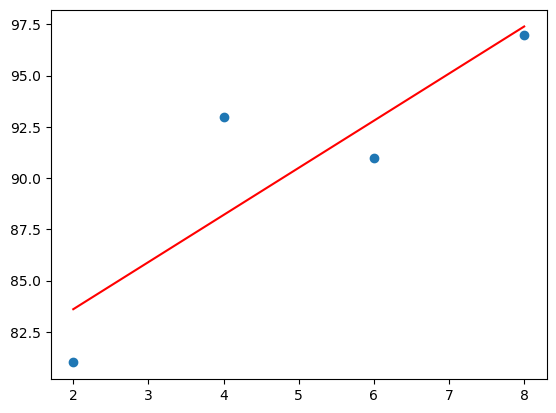

In [16]:
plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.show()